# Indonesian Contraceptive Choice

### Imports

In [2]:
import importlib
import matplotlib.pyplot as plt

import mysklearn.mypytable
importlib.reload(mysklearn.mypytable)
from mysklearn.mypytable import MyPyTable 

import mysklearn.myutils
importlib.reload(mysklearn.myutils)
import mysklearn.myutils as myutils

import mysklearn.plot_utils
importlib.reload(mysklearn.plot_utils)
import mysklearn.plot_utils as plot_utils

import mysklearn.myskutils
importlib.reload(mysklearn.myskutils)
import mysklearn.myskutils as myskutils

import mysklearn.myclassifiers
importlib.reload(mysklearn.myclassifiers)
from mysklearn.myclassifiers import MyKNeighborsClassifier, MySimpleLinearRegressor, MyNaiveBayesClassifier, MyDecisionTreeClassifier, MyDecisionTreeClassifier, MyRandomForestClassifier

import mysklearn.myevaluation
importlib.reload(mysklearn.myevaluation)
import mysklearn.myevaluation as myevaluation

import copy
import pickle

# Introduction
## Introduction to the Dataset
This Jupiter Notebook gives a storied detailed analysis on data mining and classification done on the dataset found from this link https://archive.ics.uci.edu/ml/datasets/Contraceptive+Method+Choice. This dataset is a subset of the 1987 National Indonesia Contraceptive Prevalence Survey, which samples about 1500 Indonesian women who are either not pregnant at the time of the interview or don't know they are. The list below shows the attributes stored in the dataset and were asked by the interviewer:

1. Wife's age (numerical)
2. Wife's education (categorical) 1=low, 2, 3, 4=high
3. Husband's education (categorical) 1=low, 2, 3, 4=high
4. Number of children ever born (numerical)
5. Wife's religion (binary) 0=Non-Islam, 1=Islam
6. Wife's now working? (binary) 0=Yes, 1=No
7. Husband's occupation (categorical) 1, 2, 3, 4
8. Standard-of-living index (categorical) 1=low, 2, 3, 4=high
9. Media exposure (binary) 0=Good, 1=Not good
10. Contraceptive method used (class attribute) 1=No-use, 2=Long-term, 3=Short-term

## Introduction to Classificatio
The goal of this project was to try and classify the contraceptive method used based on certain attributes that seemed to have a high correlation  to the contraceptive method used. In order to do so, we implemented our own KNN Classifier, Naive Bayes Classifier, and Random Forest Classifier. What we found was that our KNN Classifier gave the best total accuracy in predicting the contraceptive method used, while our Naive Bayes Classifier and Random Forest Classifier didn't perform as well. 



# Data Analysis
### Opening Dataset

In [3]:
cont_data_fname = os.path.join("input_data", "contraception_data.csv")
header1,table1 = myutils.create_data(cont_data_fname)
data = MyPyTable(data=table1, column_names=header1)
data.convert_to_numeric()


### Cleaning Data

In [4]:
# subsituiting number of contraceptive use to actual name
for i in range(len(data.data)):
    if (data.data[i][9] == 1):
        data.data[i][9] = "no use"
    elif (data.data[i][9] == 2):
        data.data[i][9] = "long-term"
    else:
        data.data[i][9] = "short-term"

    

## Generating Graph to Demonstrate Class Variable Frequency

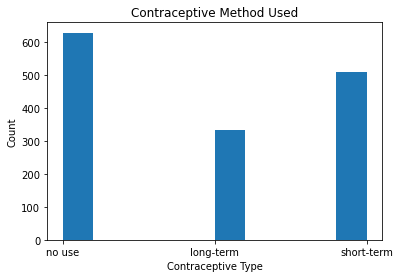

In [5]:
method_used = data.get_column("contraceptive method used")
plot_utils.histogram(method_used, "Count", "Contraceptive Type", "Contraceptive Method Used", 3)


### Notes on Figure #1
This frequency diagram shows how the class labels are distributed in the dataset. As you can see, there isn't a class label that is overwhelmingly frequent over the others, although there is definately a class inbalance between the three classes. Therefore this must be noted in analyzing the dataset and interpretating the classification results for each classifier. 

## Generating Frequency Diagram for each Contraceptive Method used Based on Total Number of Kids


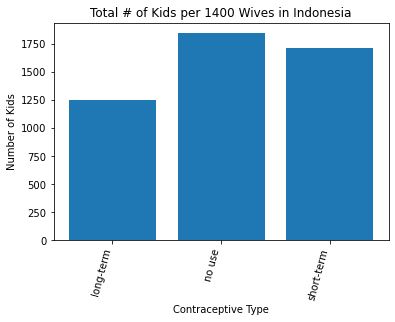

In [6]:
children_born = data.get_column("number of children")
group_names, group_subtables = myutils.group_by(data.data, 9)
sums = []
for i in range(len(group_subtables)):
    col = myutils.get_column(group_subtables[i], 3)
    nums = sum(col)
    sums.append(nums)

plot_utils.bar_chart2(group_names,sums,"Number of Kids","Contraceptive Type","Total # of Kids per 1400 Wives in Indonesia")



    



### Notes on Figure #2
As demonstrated in the chart above, there is definitely a correlation between the contraceptive method used and the total number of kids born. As expected, women with no use of a contraceptive method tend to have more kids, while woman with a long-term contraceptive method tend to have less kids. This diagram helps us identify the 'total number of kids' attribute as an important attribute in classifying the contraceptive type and should help us learn something from our classification results.  
  

## Generating Pie Charts to Compare Contraceptive Method Distributions Depending on Standard of Living Index

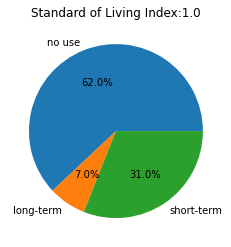

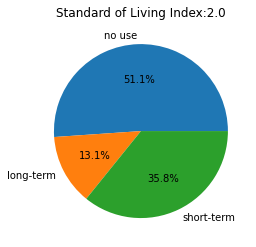

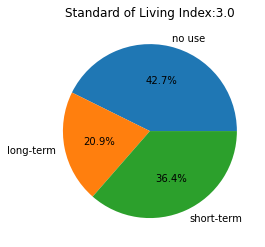

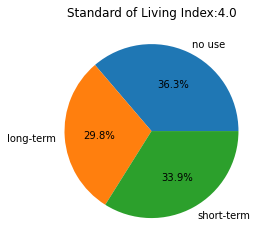

In [7]:
group_names, group_subtables = myutils.group_by(data.data, -3)
labels = ["no use", "long-term", "short-term"]
count = 0
for group in group_subtables:
    counts = [0, 0, 0]
    for instance in group:
        if instance[-1] == "no use":
            counts[0] += 1
        if instance[-1] == "long-term":
            counts[1] += 1
        if instance[-1] == "short-term":
            counts[2] += 1
    plot_utils.pie_chart(labels, counts, "Standard of Living Index:" + str(group_names[count]))
    count+=1

### Notes on Pie Charts:
As demonstrated in the pie charts, as the standard of living increases, the number of women with a no-use contraceptive method decrease, and the number of women using a long-term contraceptive method increase. This demonstrates a strong correlation between the standard of living index and contraceptive method used, which identifies the 'standard of living index' attribute as another important attribute in classifying the correct contraceptive type. 

## Wife's Age and Contraceptive Method

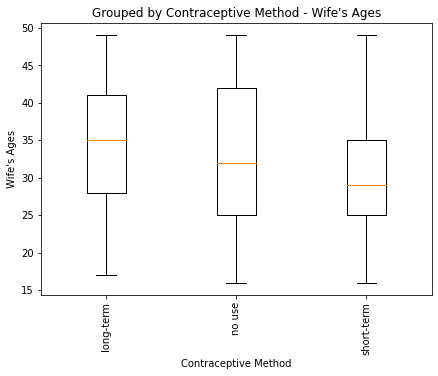

In [8]:
group_names, group_subtables = myutils.group_by(data.data, -1)

ages_grouped_by_method = [[] for i in range(len(group_names))]

for i in range(len(group_subtables)):
    for instance in group_subtables[i]:
        ages_grouped_by_method[i].append(instance[0])

plot_utils.box_plot(ages_grouped_by_method, group_names, "Contraceptive Method", "Wife's Ages", "Grouped by Contraceptive Method - Wife's Ages")

## Creating X_train and y_train

In [9]:
X = []
y = []
for i in range(len(data.data)):
    a_list = []
    a_list.append(data.data[i][0]) # high coorelation
    a_list.append(data.data[i][1]) # high coorelation
    a_list.append(data.data[i][2])
    a_list.append(data.data[i][3]) #high coorelation
    #a_list.append(data.data[i][4])
    #a_list.append(data.data[i][5])
    a_list.append(data.data[i][6]) # high coorelation
    #a_list.append(data.data[i][7])
    #a_list.append(data.data[i][8])
    X.append(a_list)
    y.append(data.data[i][9])

print(X[0])


[24.0, 2.0, 3.0, 3.0, 2.0]


In [10]:
knn_classifier = MyKNeighborsClassifier()


In [11]:
X_train, X_test, y_train, y_test = myevaluation.train_test_split(X, y, test_size=0.33, random_state=None, shuffle=True)
knn_classifier.fit(X_train, y_train)
predictions = knn_classifier.predict(X_test)
acc = myskutils.get_accuracy(predictions, y_test)
print(acc)

0.4989733059548255


## Naive Bayes Classification

In [12]:
print(X[0])
bayes = MyNaiveBayesClassifier()

[37.0, 4.0, 4.0, 3.0, 1.0]


In [13]:
X = []
y = []
for i in range(len(data.data)):
    a_list = []
    a_list.append(data.data[i][0]) # high coorelation
    a_list.append(data.data[i][1]) # high coorelation
    a_list.append(data.data[i][2])
    a_list.append(data.data[i][3]) # high coorelation
    #a_list.append(data.data[i][4])
    #a_list.append(data.data[i][5])
    a_list.append(data.data[i][6]) # high coorelation
    #a_list.append(data.data[i][7])
    #a_list.append(data.data[i][8])
    X.append(a_list)
    y.append(data.data[i][9])

In [14]:
X_train, X_test, y_train, y_test = myevaluation.train_test_split(X, y, test_size=0.33, random_state=None, shuffle=True)

In [15]:
bayes.fit(X_train, y_train)
predictions = bayes.predict(X_test) 

In [30]:
outfile = open("bayes.p", "wb")
pickle.dump(bayes, outfile)

outfile.close()

In [17]:
accuracy = myskutils.get_accuracy(predictions, y_test)
print("Naive Bayes Classification Accuracy:", accuracy) 

Naive Bayes Classification Accuracy: 0.5318275154004107


# Random Forest Classifier

In [18]:
forest = MyRandomForestClassifier()

In [19]:
X = []
y = []
for i in range(len(data.data)):
    a_list = []
    a_list.append(data.data[i][0]) # high coorelation
    a_list.append(data.data[i][1]) # high coorelation
    a_list.append(data.data[i][2]) # high coorelation
    a_list.append(data.data[i][3]) # high coorelation
    #a_list.append(data.data[i][4])
    #a_list.append(data.data[i][5])
    a_list.append(data.data[i][6]) # high coorelation
    #a_list.append(data.data[i][7])
    #a_list.append(data.data[i][8])
    X.append(a_list)
    y.append(data.data[i][9])

In [20]:
X_train, X_test, y_train, y_test = myevaluation.train_test_split(X, y, test_size=0.33, random_state=None, shuffle=True)

In [21]:
forest.fit(X_train, y_train)
predictions = forest.predict(X_test) 

In [22]:
accuracy = myskutils.get_accuracy(predictions, y_test)
print("Random Forest Classification Accuracy:", accuracy) 

Random Forest Classification Accuracy: 0.43121149897330596


## Additional Exploratory Data Analysis

In [23]:
group_names, group_subtables = myutils.group_by(data.data, -3)

In [24]:
print(group_names)

[1.0, 2.0, 3.0, 4.0]


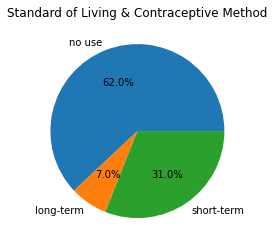

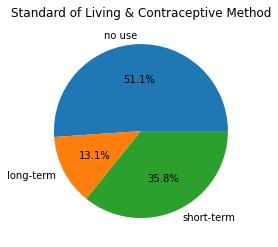

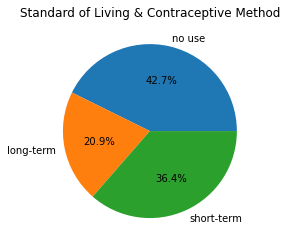

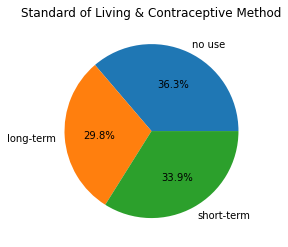

In [25]:
labels = ["no use", "long-term", "short-term"]
for group in group_subtables:
    counts = [0, 0, 0]
    for instance in group:
        if instance[-1] == "no use":
            counts[0] += 1
        if instance[-1] == "long-term":
            counts[1] += 1
        if instance[-1] == "short-term":
            counts[2] += 1
    plot_utils.pie_chart(labels, counts, "Standard of Living & Contraceptive Method")

### Notes

As the standard of living index increases, the percentage of "no use" contraceptive methods decreases, while the "long-term" contraceptive method percentage increases.

## Wife's Age and Contraceptive Method

In [26]:
group_names, group_subtables = myutils.group_by(data.data, -1)

In [27]:
print(group_names)

['long-term', 'no use', 'short-term']


In [28]:
ages_grouped_by_method = [[] for i in range(len(group_names))]

for i in range(len(group_subtables)):
    for instance in group_subtables[i]:
        ages_grouped_by_method[i].append(instance[0])

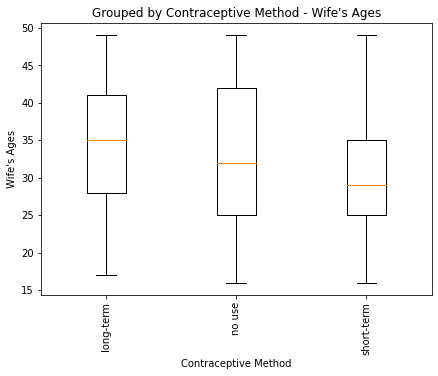

In [29]:
plot_utils.box_plot(ages_grouped_by_method, group_names, "Contraceptive Method", "Wife's Ages", "Grouped by Contraceptive Method - Wife's Ages")